In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [14]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head(4)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualPrice,volume,total_purchase_quantity,total_purchase_Dollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


In [4]:
# summary stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
total_purchase_quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_Dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

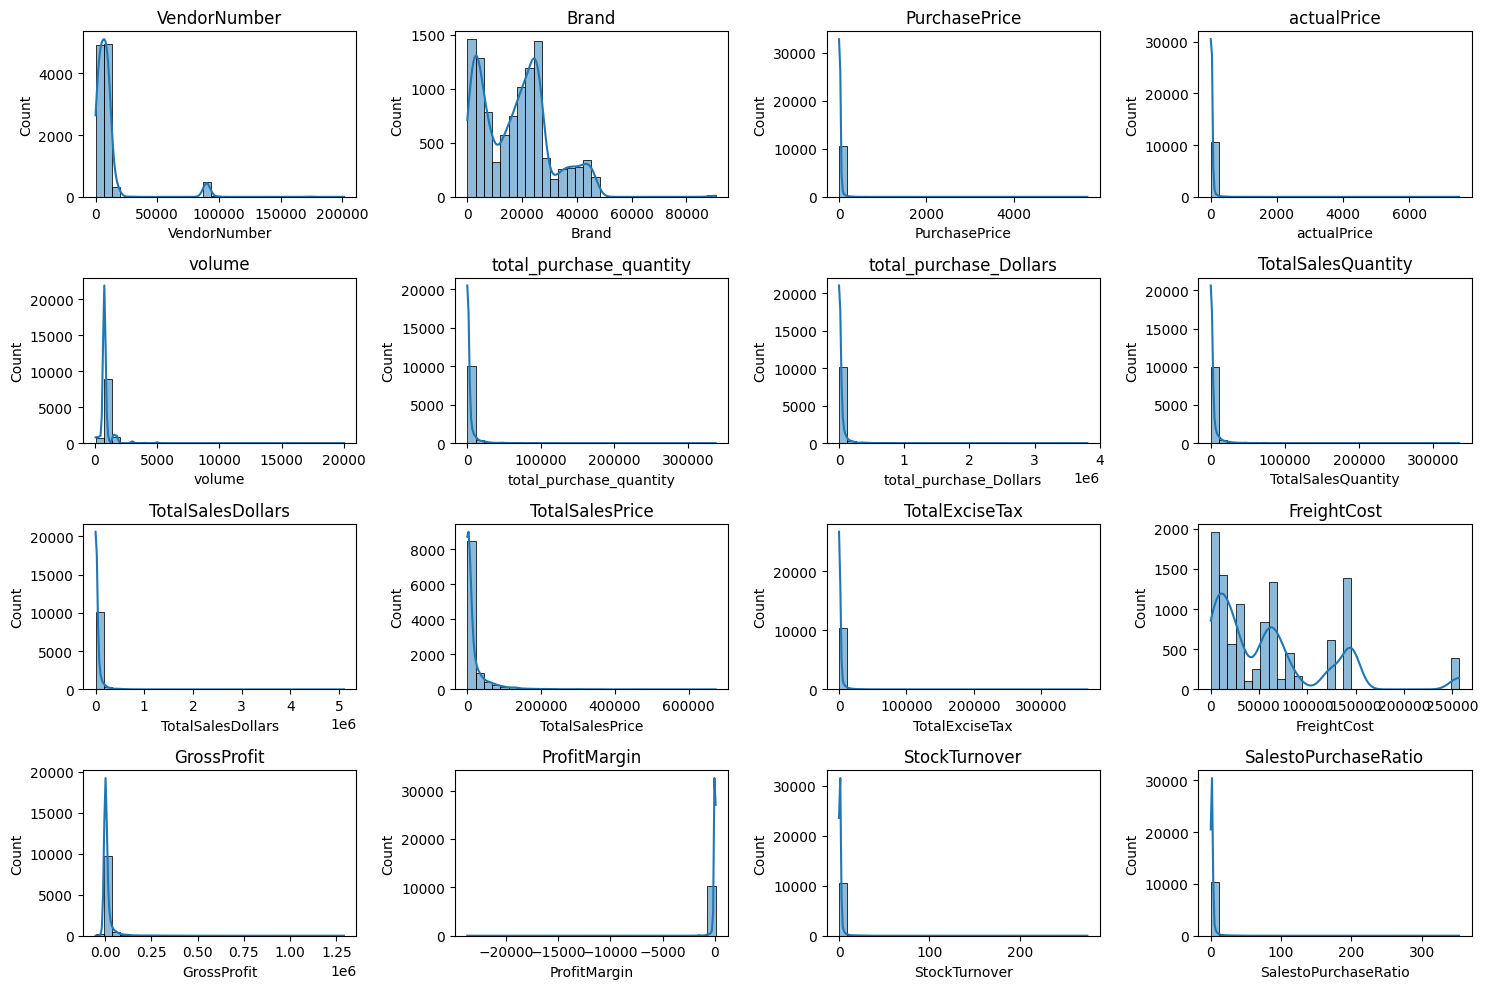

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

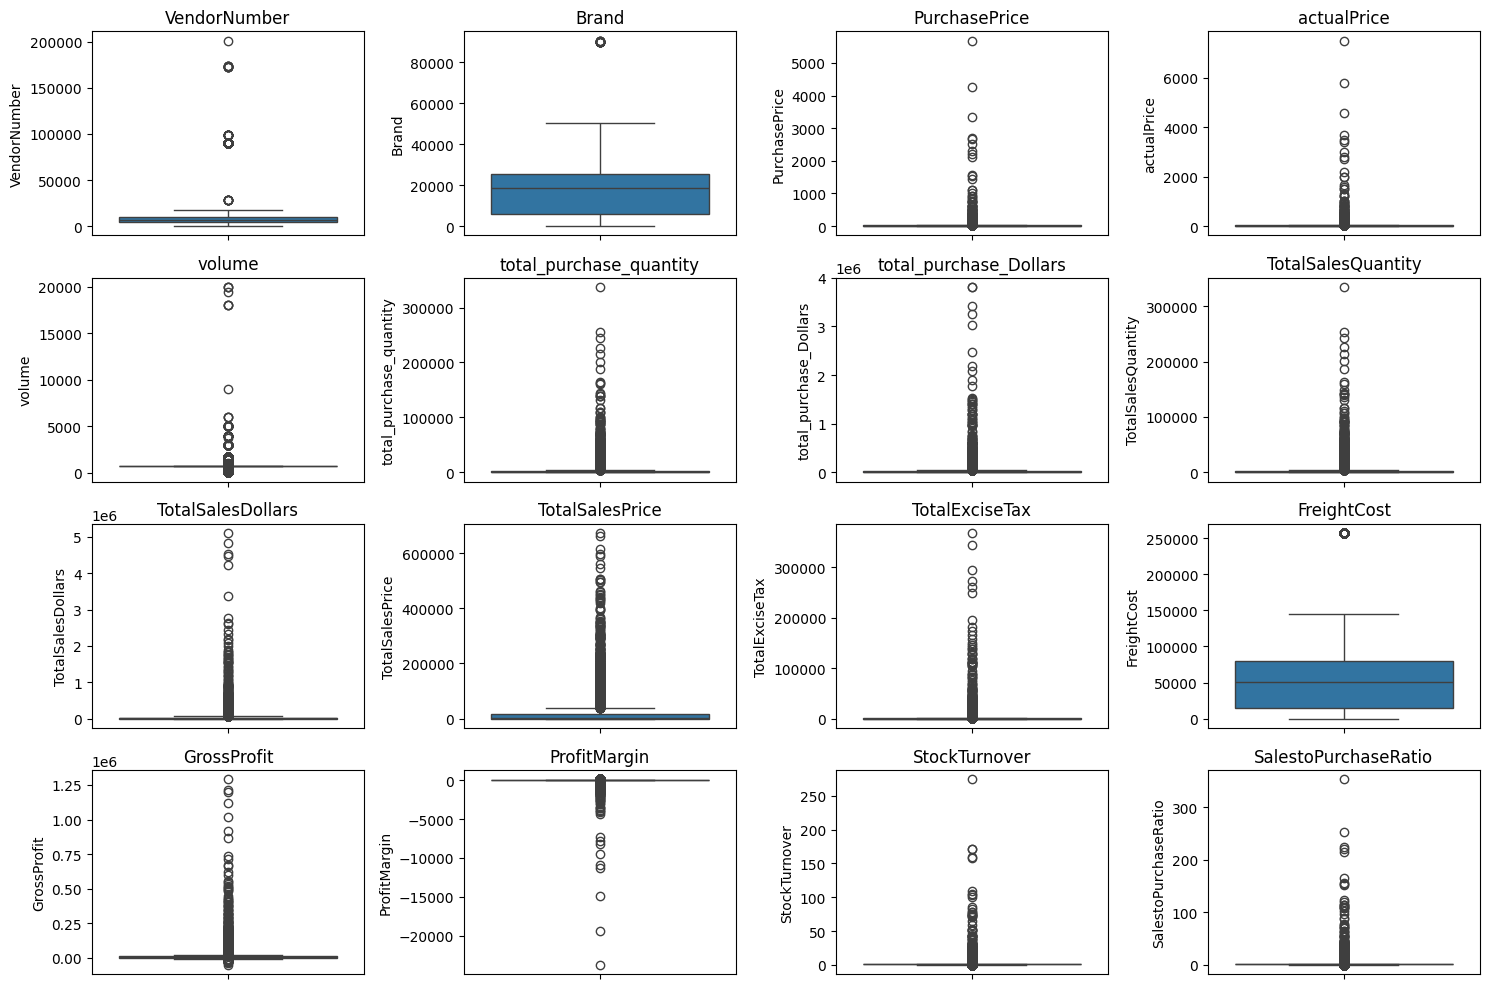

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
df = pd.read_sql_query("""
SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0 
And ProfitMargin > 0
And TotalSalesQuantity > 0
""",conn)

In [21]:
categorical_cols= ["VendorName","Description"]

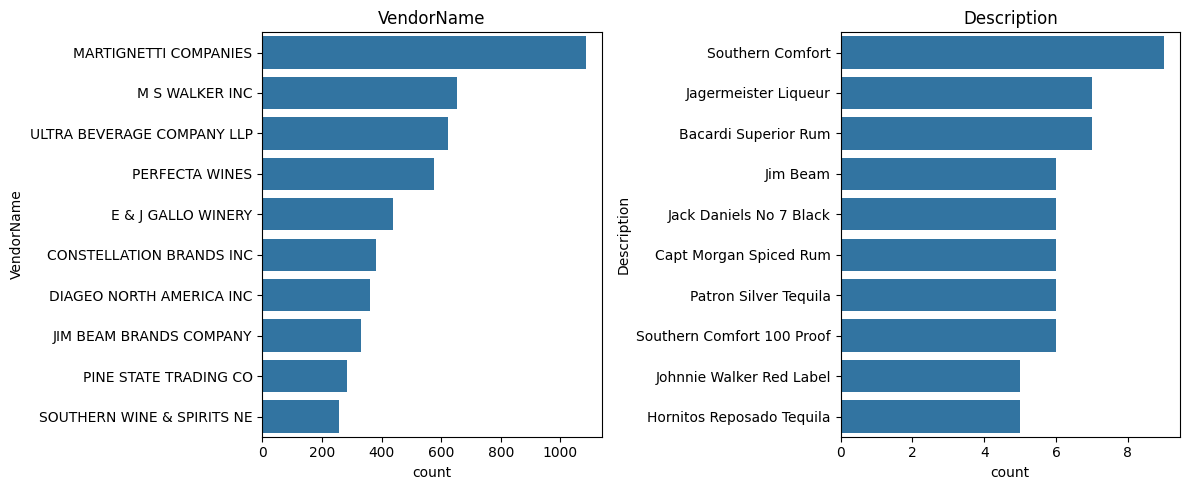

In [28]:
plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col],order = df[col].value_counts().index[:10])
    plt.title(col)
plt.tight_layout()
plt.show()

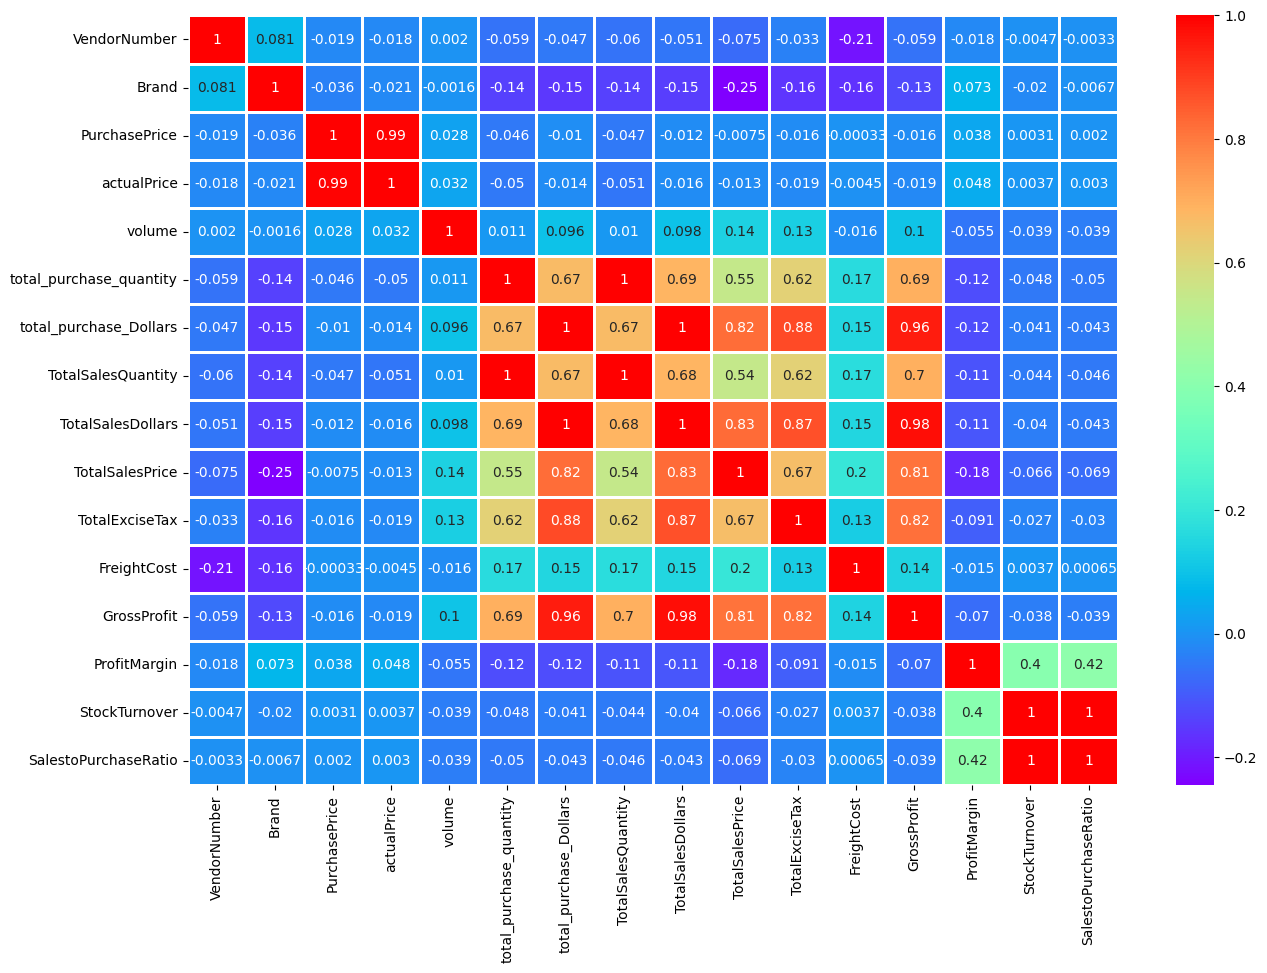

In [39]:
#correlation
plt.figure(figsize = (15,10))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation,annot=True,linewidth = 1,cmap='rainbow')
plt.show()

INSIGHTS:

1. Total_Sales_Quantity correlates strongly with:
    . Total_purchase_dollars
    . Total_purchase_quantity 
    Indicating good turnover, We should follow the current ordering patterns.

2. GrossProfit correlates strongly with:
   . TotalSalesDollars (earnings from the sale)
   . TotalSalesQuantity
    But has weak correlation with TotalSalesPrice (unit price of the product) and PurchasePrice. Suggests that we make more profit by more sales, not      by increasing the price.
    So focus on Unit Turnover, Marketing, and give volume based offers.

Finding Out which brands have low Sales but high Profit Margins, So we can help them improve.

In [332]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [337]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000] #run this for better Visualization

In [333]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)

In [334]:
hight_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [335]:
target_brand = brand_performance[(low_sales_threshold >= brand_performance['TotalSalesDollars']) & (brand_performance['ProfitMargin'] >= hight_margin_threshold)]

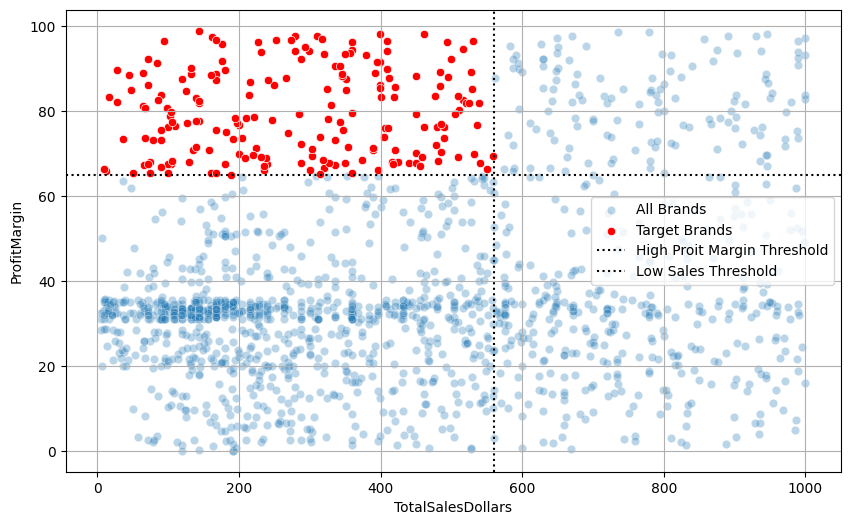

In [338]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance,x = 'TotalSalesDollars', y = 'ProfitMargin',alpha = 0.3,label="All Brands")
sns.scatterplot(x = target_brand['TotalSalesDollars'], y = target_brand['ProfitMargin'],color = 'red',label="Target Brands")

plt.axhline(hight_margin_threshold,linestyle=':',color='black',label='High Proit Margin Threshold')
plt.axvline(low_sales_threshold,linestyle=':',color='black',label='Low Sales Threshold')

plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1000:
        return f"{value / 1000:.2f}K"
    else:
        return str(value)

In [18]:
top_vendors.apply(format_dollars)

VendorName
DIAGEO NORTH AMERICA INC      68.74M
MARTIGNETTI COMPANIES         40.96M
PERNOD RICARD USA             32.28M
JIM BEAM BRANDS COMPANY       31.90M
BACARDI USA INC               25.01M
CONSTELLATION BRANDS INC      24.47M
E & J GALLO WINERY            18.55M
BROWN-FORMAN CORP             18.48M
ULTRA BEVERAGE COMPANY LLP    17.80M
M S WALKER INC                15.44M
Name: TotalSalesDollars, dtype: object

In [19]:
top_brands.apply(format_dollars)

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

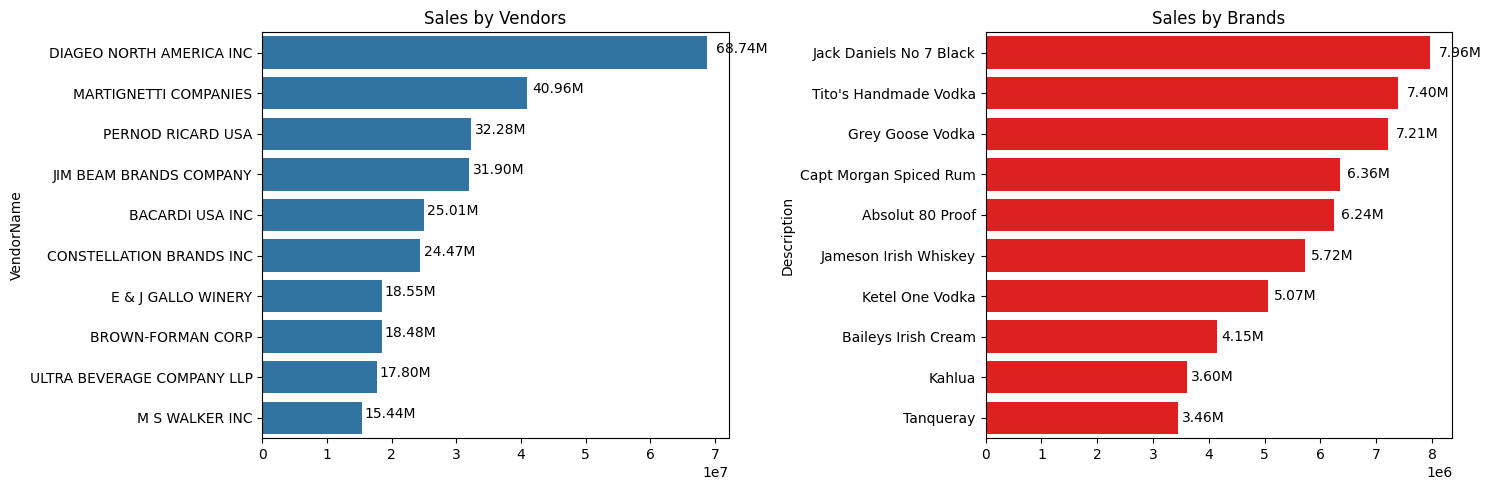

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Sales by Vendors")
ax1 = sns.barplot(y = top_vendors.index,x = top_vendors.values)
for bar in ax1.patches:
    ax1.text(
        bar.get_width()+(bar.get_width()*0.02),
        bar.get_y()+bar.get_height()/2,
        format_dollars(bar.get_width())
    )
    
plt.subplot(1,2,2)
plt.title("Sales by Brands")
ax2 = sns.barplot(y = top_brands.index,x = top_brands.values,color="red")
for bar in ax2.patches:
    ax2.text(
        bar.get_width()+(bar.get_width()*0.02),
        bar.get_y()+bar.get_height()/2,
        format_dollars(bar.get_width()),
        ha='left',va='center',fontsize=10,color='black'
    )

plt.tight_layout()
plt.show()

Vendor Contribution in Performance

In [23]:
vendor_performance = df.groupby('VendorName').agg({
    'total_purchase_Dollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [26]:
vendor_performance['PurchaseContribution%'] = round(vendor_performance['total_purchase_Dollars']/(vendor_performance['total_purchase_Dollars'].sum()),2)

In [27]:
top_vendors = vendor_performance.nlargest(10,'PurchaseContribution%')
top_vendors['PurchaseContribution%'] = top_vendors["PurchaseContribution%"]*100

How much total_procurement is dependent on the top vendors?

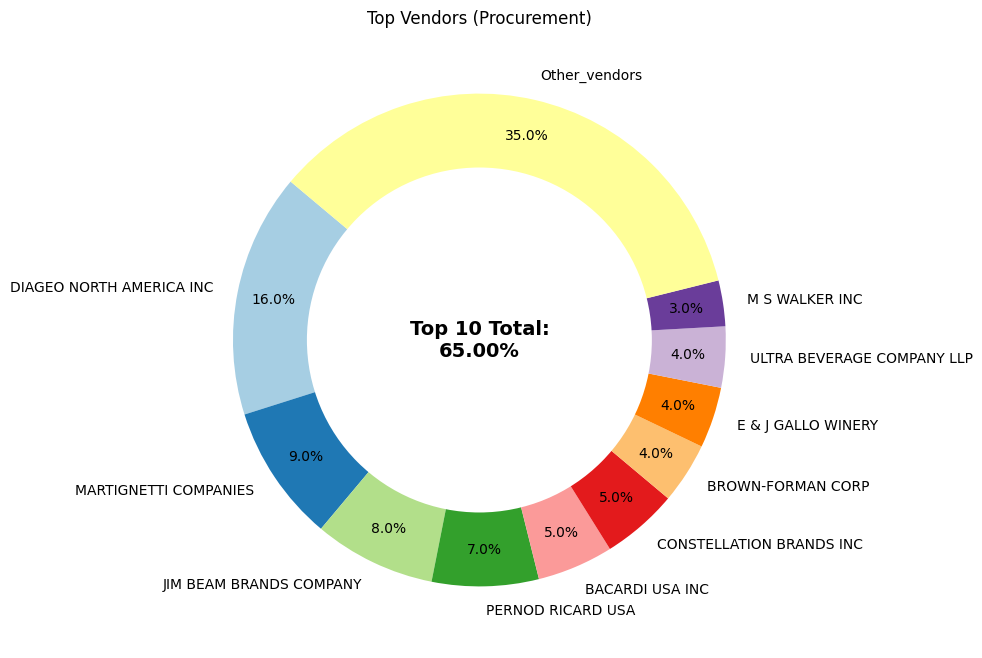

In [11]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100-total_contribution

vendors.append('Other_vendors')
purchase_contribution.append(remaining_contribution)

fig,ax = plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",ha='center',fontsize=14,va='center',fontweight='bold')
plt.title("Top Vendors (Procurement)")
plt.show()

Does buying more Reduce the Unit Price:- 

In [267]:
df["unit_price"] = df["total_purchase_Dollars"]/df['total_purchase_quantity']

In [270]:
df['order_size'] = pd.qcut(df['total_purchase_quantity'],q=3,labels=['small','medium','largest'])

In [272]:
df.groupby('order_size')[['unit_price']].mean().reset_index()

,order_size,unit_price
0,small,39.068186
1,medium,15.486414
2,largest,10.777625


Which Vendors have the lowest Inventory Turnouvers?

In [379]:
low_turnover_data = (df.groupby('VendorName')[['StockTurnover']].mean()).nsmallest(10,'StockTurnover').reset_index()

<Axes: xlabel='StockTurnover', ylabel='VendorName'>

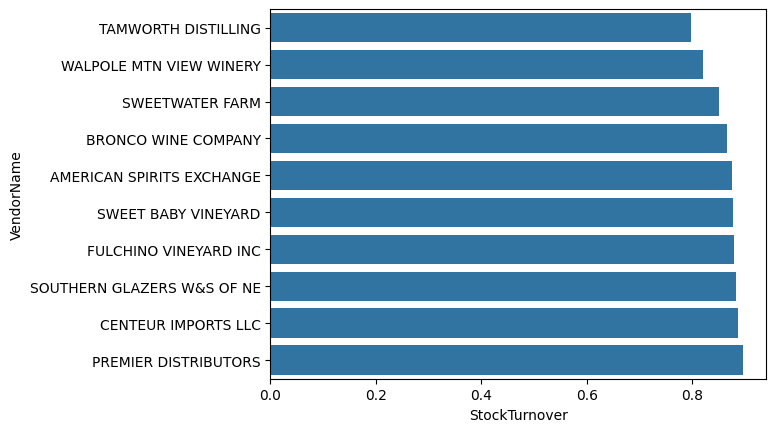

In [387]:
sns.barplot(data = low_turnover_data,y = 'VendorName',x = 'StockTurnover')

How much inventory is locked in unsoled inventory per Vendor, and which vendors contribute most of it?

In [392]:
df['unsold_inventory_value'] =(df['total_purchase_quantity']-df['TotalSalesQuantity'])*df['PurchasePrice']

In [393]:
inventory_value_per_vendor = (df.groupby("VendorName")['unsold_inventory_value'].sum().reset_index()).nlargest(10,'unsold_inventory_value')

In [394]:
inventory_value_per_vendor['unsold_inventory_value'] = inventory_value_per_vendor['unsold_inventory_value'].apply(format_dollars)

In [395]:
inventory_value_per_vendor

,VendorName,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K
